# Boehringer Ingelheim Group 1 MVP

  
Thomas Yap | **44930534**  
Michelle Wang | **45374627**
Zoe Fong | **45348243**
Christopher Rigor | **45183783**
Rick Kalouche | **TBC**

# Introduction 

This Jupyter notebook acts as the MVP for the COMP3850 Computing Industry Project and we will include any code or research done in here.


## Research

Due to the nature of the project, we will be exploring using python code to try determine some business insights for BI with their given sales data.

# Aims

**MAIN GOALS :**

**Where should Boehringer Ingelheim focus their sales efforts to.**

From the main goal, we can break it into smaller components.

**SUB-GOALS :**

1) Which business unit has been performing so far ( Can be done graphically )

2) Modelling to be done for predicted level of sales


# Our Approach

To answer our hypothesis, we are using the following approach.

1) Data preparation: load and transform the data as preparation for the analysis

2) Answering sub-hypothesis 1 through exploration and visualtisation of the dataset

3) Answering sub-hypothesis 2 through creating models in order to try to predict sales levels

# Packages

In [4]:
import seaborn as sns
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import polyfit
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from matplotlib.pyplot import imread
from sklearn import preprocessing

#To remove the red box errors just to make the notebook look neater
import warnings
warnings.filterwarnings("ignore")

# 1. Dataset and Dataframe Manipulation

## 1.1. Sales Data

We have combined and cleaned the data from excel and are going to load the current data set as of April 6th into various DataFrames.

We will conduct our exploration and analysis on this dataset

**Data Cleaning and Manipulation**

In [5]:
# Import the Distribution Data into Jupyter
## df4 =  pd.read_csv(edufile,na_values = ':',usecols = ("TIME","GEO","Value"))
eastern = pd.read_csv("Data Extract/CSV/EASTERN-DATA-COMBINED.csv")
western = pd.read_csv("Data Extract/CSV/WESTERN-COMBINED-DATA.csv")
combined = pd.read_csv("Data Extract/CSV/RENAME-CONSOLIDATED-DATA-COMBINED.csv") 
market = pd.read_csv("Data Extract/CSV/PACE students - market data (confidential).csv")
wholesaler_to_retail = pd.read_csv("Data Extract/CSV/PACE students - wholesaler to retail.csv",encoding='cp1252')

**Aggregating data**

Market Data

In [20]:
market.[columns]

Index(['Period', 'MAT', 'YTD', 'Qtr', 'CalYr', 'Manufacturer', 'SubCategory2',
       'SubCategory3', 'Brand', 'Product', 'ProductCode',
       'ProductionCompanion', 'Species', 'Region', 'Units', 'Value', 'Doses',
       'YEAR', 'Manufacturer ADJ', 'Brand ADJ', 'Product ADJ',
       'SubCategory3.1', 'Species ADJ', 'Units ADJ', 'Doses ADJ',
       'Doses / Unit', 'Monthly Doses', 'BI Business Unit',
       'BI Market Only FLG'],
      dtype='object')

In [6]:
market_drop = market.drop(['MAT', 'YTD', 'SubCategory2',
       'SubCategory3', 'Brand', 'Product', 'ProductCode',
       'ProductionCompanion', 'Species', 'Region', 'Units', 'Value', 'Doses',
       'YEAR', 'Manufacturer ADJ', 'Brand ADJ', 'Product ADJ',
       'SubCategory3.1', 'Species ADJ', 'Doses ADJ',
       'Doses / Unit', 'Monthly Doses',
       'BI Market Only FLG'],axis = 1).dropna()



In [190]:
market_drop

,Period,Qtr,CalYr,Manufacturer,Units ADJ,BI Business Unit
0,2020-10,Dec-20,Cal Year 2020,Elanco,154.0,Cattle & Sheep
1,2020-10,Dec-20,Cal Year 2020,Elanco,29.0,Cattle & Sheep
2,2020-11,Dec-20,Cal Year 2020,Elanco,59.0,Cattle & Sheep
3,2020-11,Dec-20,Cal Year 2020,Elanco,45.0,Cattle & Sheep
4,2020-11,Dec-20,Cal Year 2020,Elanco,10.0,Cattle & Sheep
...,...,...,...,...,...,...
199394,2018-03,Mar-18,Cal Year 2018,Vetoquinol,84.0,Pets
199395,2018-03,Mar-18,Cal Year 2018,Vetoquinol,84.0,Pets
199396,2018-03,Mar-18,Cal Year 2018,Vetoquinol,180.0,Pets
199397,2018-03,Mar-18,Cal Year 2018,Vetoquinol,36.0,Pets


In [7]:
# Merge data to Period with Units sold
market_drop_unit = market_drop.groupby(['Period','BI Business Unit']).sum().reset_index()
market_drop_unit = market_drop_unit.astype({"Period": str})
market_drop_unit

,Period,BI Business Unit,Units ADJ
0,2018-01,Cattle & Sheep,182021.890
1,2018-01,Equine,92156.000
2,2018-01,No Bus,30262.000
3,2018-01,Pets,821613.211
4,2018-01,Swine,17045.538
...,...,...,...
175,2020-12,Cattle & Sheep,194311.400
176,2020-12,Equine,133070.000
177,2020-12,No Bus,40328.000
178,2020-12,Pets,1321109.000


Wholesaler to Retail

In [131]:
wholesaler_to_retail.head()

,Year,Month,Distributors Name,CUSTOMER ID,Postcode,WHS_SKU_ID,Suppliercode,Product,Quantity,Price
0,2020.0,June,Eastern Distributors,AU924404,3079,WSLDB3,CA472075WAL,SENTINEL LARGE DOG 22 - 45KG BLUE 3 CHEWS,6.0,56.401100
1,2020.0,June,Eastern Distributors,AU924404,3079,WSLDB6,CA472083WALZ1,SENTINEL LARGE DOG 22 - 45KG BLUE 6 CHEWS,2.0,99.507053
2,2020.0,June,Eastern Distributors,AU924404,3079,WSMDY6,CA472583WALZ1,SENTINEL MEDIUM DOG 11 - 22KG YELLOW 6 CHEWS,3.0,91.334903
3,2020.0,June,Eastern Distributors,AU924404,3079,WSSDG6,CA473083WAL,SENTINEL SMALL DOG 4 - 11KG GREEN 6 CHEWS,6.0,84.136057
4,2020.0,June,Eastern Distributors,AU924404,3079,WACS6,04506700,ADVANTAGE CAT 0-4KG SMALL 6'S ORANGE,1.0,50.102048


In [130]:
wholesaler_to_retail.columns

Index(['Year', 'Month', 'Distributors Name', 'CUSTOMER ID', 'Postcode',
       'WHS_SKU_ID', 'Suppliercode', 'Product', 'Quantity', 'Price'],
      dtype='object')

In [144]:
wholesaler_to_retail_drop = wholesaler_to_retail.drop(['WHS_SKU_ID', 'Suppliercode', 'Product'],axis =1)
wholesaler_to_retail_drop = wholesaler_to_retail_drop.dropna()
wholesaler_to_retail_drop

,Year,Month,Distributors Name,CUSTOMER ID,Postcode,Quantity,Price
0,2020.0,June,Eastern Distributors,AU924404,3079,6.0,56.401100
1,2020.0,June,Eastern Distributors,AU924404,3079,2.0,99.507053
2,2020.0,June,Eastern Distributors,AU924404,3079,3.0,91.334903
3,2020.0,June,Eastern Distributors,AU924404,3079,6.0,84.136057
4,2020.0,June,Eastern Distributors,AU924404,3079,1.0,50.102048
...,...,...,...,...,...,...,...
144505,2020.0,May,Western Distributors,AU923112,3840,12.0,10.600000
144511,2020.0,May,Western Distributors,In Google,2756,6.0,69.360000
144512,2020.0,May,Western Distributors,In Google,2756,6.0,69.360000
144513,2020.0,May,Western Distributors,In Google,2756,5.0,69.360000


# 2. Data Visualisation / Exploration

According to For Dummies, a correlation coefficient can be interpreted this way:

A positive (uphill) relationship: the variables move together.

Exactly 1 is a perfect relationship
Between 0.70 and 1 is a strong relationship
Between 0.50 and 0.70 is a moderate relationship
Between 0.30 and 0.50 is a weak relationship
A negative (downhill) relationship: the variables move opposite to each other.

Exactly -1 is a perfect relationship
Between -0.70 and -1 is a strong relationship
Between -0.50 and -0.70 is a moderate relationship
Between -0.30 and -0.50 is a weak relationship
A correlation score between -0.30 and +0.30 shows no relationship.

### 2.1. Business Units

<AxesSubplot:xlabel='Period'>

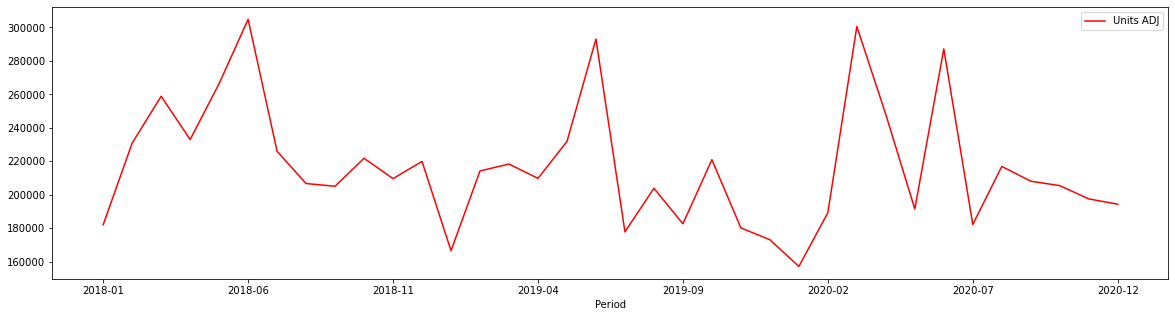

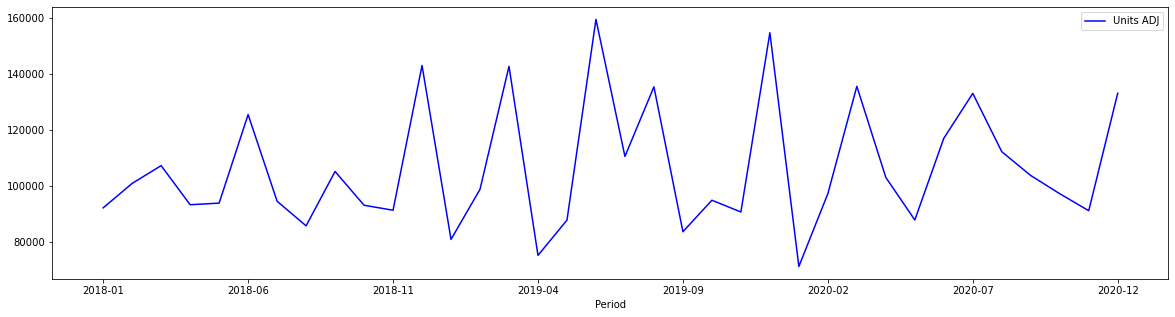

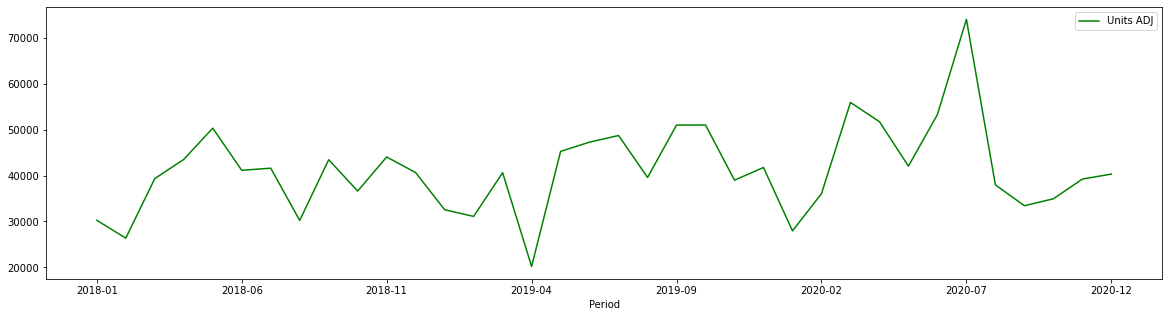

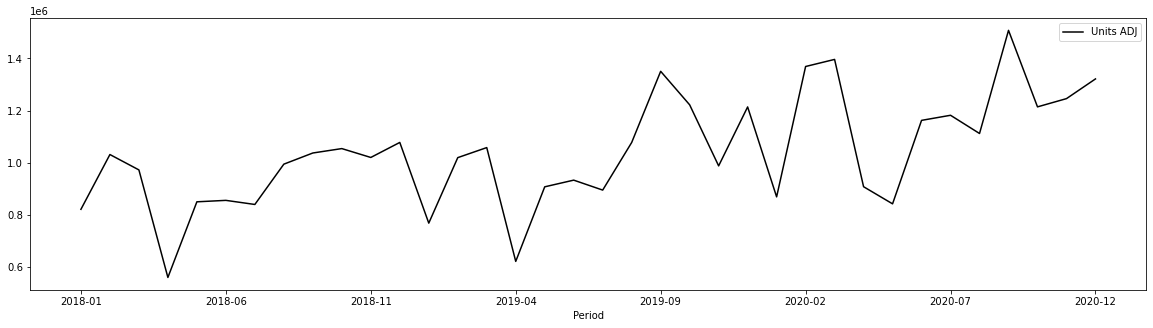

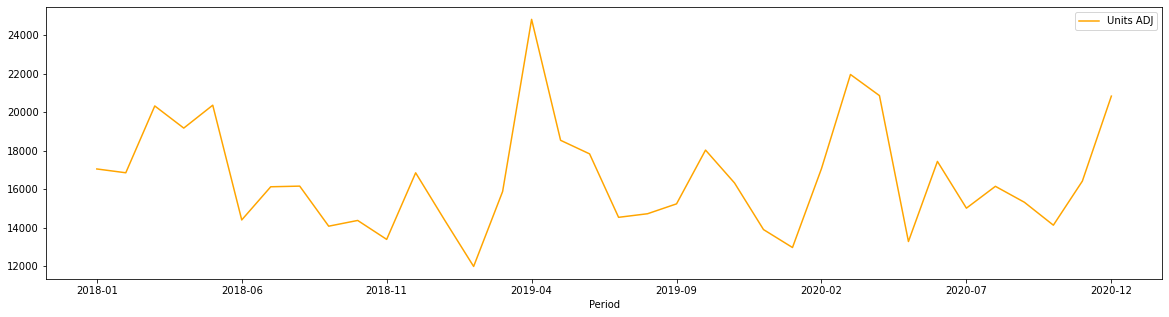

In [192]:
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep'].plot(x='Period',y='Units ADJ',figsize=(20,5),c = "red")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine'].plot(x='Period',y='Units ADJ',figsize=(20,5),c = "blue")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus'].plot(x='Period',y='Units ADJ',figsize=(20,5),c = "green")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets'].plot(x='Period',y='Units ADJ',figsize=(20,5),c = "black")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine'].plot(x='Period',y='Units ADJ',figsize=(20,5),c = "orange")

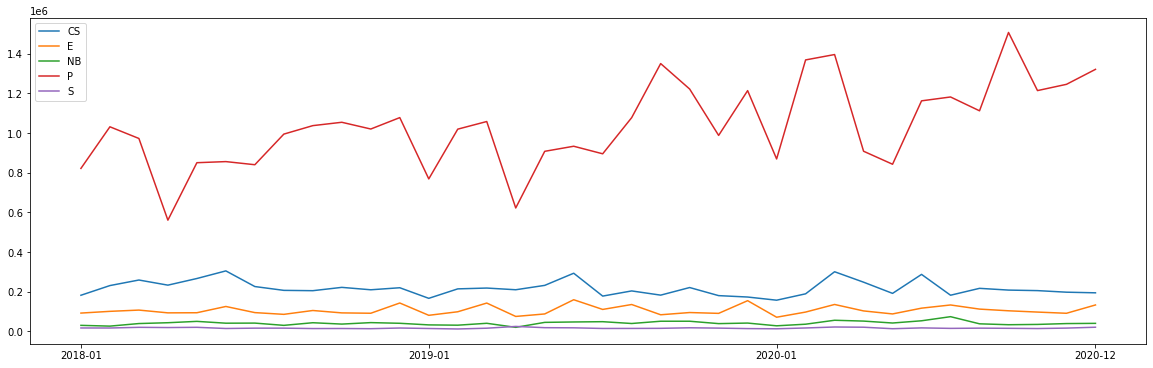

In [193]:
x1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Period']
y1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Units ADJ']
x2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Period']
y2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Units ADJ']
x3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Period']
y3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Units ADJ']
x4 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets']['Period']
y4 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets']['Units ADJ']
x5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Period']
y5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Units ADJ']
x_tick = ['2018-01', '2019-01', '2020-01', '2020-12']
plt.figure(figsize=(20, 6))
plt.plot(x1, y1,label ="CS")
plt.plot(x2, y2,label ="E")
plt.plot(x3, y3,label ="NB")
plt.plot(x4, y4,label ="P")
plt.plot(x5, y5,label ="S")
plt.xticks(x_tick)

plt.legend()

From the combined sales graph, we can observe that Pets are overwhelmingly larger in terms of sales of products. However, we need to also understand that this plot does not have the distinction between products and their associated usage. But let's observe the trends in the sales for the other units except pets

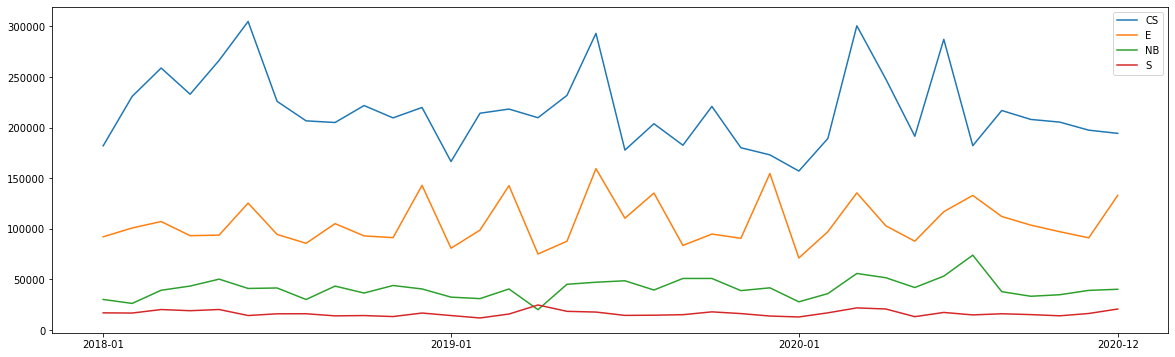

In [194]:
x1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Period']
y1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Units ADJ']
x2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Period']
y2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Units ADJ']
x3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Period']
y3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Units ADJ']
x5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Period']
y5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Units ADJ']
x_tick = ['2018-01', '2019-01', '2020-01', '2020-12']
plt.figure(figsize=(20, 6))
plt.plot(x1, y1,label ="CS")
plt.plot(x2, y2,label ="E")
plt.plot(x3, y3,label ="NB")
plt.plot(x5, y5,label ="S")
plt.xticks(x_tick)

plt.legend()

# 3. Modelling

### 3.1. Based on Market Data, predictions on future sales

#### Use Simple Linear Regression to find the most "impactful" variable to units sold

Convert Categorical Strings into float variables

In [8]:
Period = market_drop['Period']
Period_Unique = Period.unique()

Qtr = market_drop['Qtr']
Qtr_Unique = Qtr.unique()

CalYr = market_drop['CalYr']
CalYr_Unique = CalYr.unique()

Manufacturer = market_drop['Manufacturer']
Manufacturer_Unique = Manufacturer.unique()

BI_Business_Unit = market_drop['BI Business Unit']
BI_Business_Unit_Unique = BI_Business_Unit.unique()

In [9]:
le = preprocessing.LabelEncoder()
le.fit(Period_Unique)
arr1 = le.transform(Period)

le.fit(Qtr_Unique)
arr2 = le.transform(Qtr)

le.fit(CalYr_Unique)
arr3 = le.transform(CalYr)

le.fit(Manufacturer_Unique)
arr4 = le.transform(Manufacturer)

le.fit(BI_Business_Unit_Unique)
arr5 = le.transform(BI_Business_Unit)

In [20]:
market_drop_model = pd.DataFrame({'Period':arr1,'Qtr':arr2, 'CalYr':arr3, 'Manufacturer':arr4,'BI Business Unit':arr5,'Units ADJ':market_drop['Units ADJ'].astype(int)})

In [21]:
market_drop_model.columns

Index(['Period', 'Qtr', 'CalYr', 'Manufacturer', 'BI Business Unit',
       'Units ADJ'],
      dtype='object')

In [22]:
X = market_drop_model[['Period','Qtr', 'CalYr', 'Manufacturer','BI Business Unit']]
y = market_drop_model[['Units ADJ']]
X_train, X_test = train_test_split(X, test_size=0.3, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
MSE:  1323230.8196446518
R2: 0.007525827807427166


In [24]:
# Obtain MSE and r2 for training data
y_train_pred = model.predict(X_train)
print("Checking training values")
print("MSE: ", mean_squared_error(y_train,y_train_pred))
print("R2:" , r2_score(y_train, y_train_pred))

Checking training values
MSE:  1170634.0869407011
R2: 0.008032073148192431


#### Logistic Regression

In [1]:
# Testing a Logistic Regression model with different number of features
model = LogisticRegression()

for i in range(1,10):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)

    y_pred = rfe.predict(X_test)
    print("Test accuracy",i,":", accuracy_score(y_test, y_pred))
    print("Confusion matrix",i)
    print(confusion_matrix(y_test, y_pred))
    print()

NameError: name 'LogisticRegression' is not defined

#### DTC

In [26]:
# Testing a Decision Tree Classifier model with different number of features
model = DecisionTreeClassifier(random_state=0, max_depth = 6)

for i in range(1,10):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)

    y_pred = rfe.predict(X_test)
    print("Test accuracy",i,":", accuracy_score(y_test, y_pred))
    print("Confusion matrix",i)
    print(confusion_matrix(y_test, y_pred))
    print()

Test accuracy 1 : 0.06191401017948031
Confusion matrix 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Test accuracy 2 : 0.0680920171443879
Confusion matrix 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Test accuracy 3 : 0.06784087864987945
Confusion matrix 3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Test accuracy 4 : 0.06779065095097776
Confusion matrix 4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Test accuracy 5 : 0.06779065095097776
Confusion matrix 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Test accuracy 6 : 0.06779065095097776
Confusion matrix 6
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 